# Gaussian Mixture Models with EM

1. Fill in the code to implement log_sum_exp and loglikelihood function, that outputs the log likelihood of given data X.
2. Fill in the code to implement EM algorithm, following the instructions to fill in the code of E-step and M-step.
3. We will now try different number of iterations. Fill in the code for running EM algorithm and plotting. 
4. Report how many iterations that EM algorithm to completion(convergence)? And observe how does loglikelihood change over iterations by plotting the loglikelihood.

Hint: you can use library(from sklearn.mixture import GaussianMixture) to confirm your algorithm implementation. 

In [7]:
# Let us first import some modules for this problem
import numpy as np
import matplotlib.pyplot as plt 
import copy
from scipy.stats import multivariate_normal

%matplotlib inline

## 1. Create synthetic data
We have gone through all the theoretical concepts of the guassian mixture models. Here, we will generate synthetic data from a mixture of three Gaussians, and then we visualize generated data.


In [3]:
def generate_data(num_data, means, covariances, weights):
    """ Creates a list of data points """
    num_clusters = len(weights)
    data = []
    for i in range(num_data):
        #  Use np.random.choice and weights to pick a cluster id greater than or equal to 0 and less than num_clusters.
        k = np.random.choice(len(weights), 1, p=weights)[0]

        # Use np.random.multivariate_normal to create data from this cluster
        x = np.random.multivariate_normal(means[k], covariances[k])

        data.append(x)
    return data

In [4]:
# Initialize parameters for creating synthetic data
init_means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 5]  # mean of cluster 3
]
init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.92, .38], [.38, .91]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
init_weights = [1/4., 1/2., 1/4.]  # weights of each cluster

# Generate data
np.random.seed(4)
X = generate_data(100, init_means, init_covariances, init_weights)

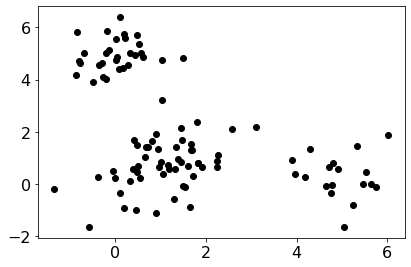

In [6]:
## plt.figure()
d = np.vstack(X)
plt.plot(d[:,0], d[:,1],'ko')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

## 2. E-M algorithm
To solve the problem of which datapoints came from which guassian, we implement EM algorithm here. The way it works is that it will start by placing guassians randomly, which means that generates random mean and variance for the guassian. Then it will iterate over these two steps until it converges.

### 2.1 E step: 
With the current means and variances, we calculate the probability of each data point $x_i$ coming from each guassian.

### 2.2 M step:
After getting the probability, we re-estimate the guassians' new mean and variance.

Hint: you can use multivariate_normal.pdf to compute the the likelihood of seeing a data point in a multivariate Gaussian distribution and np.outer to estimate the covariance matrix from data.

In [29]:
def EM(data, init_means, init_covariances, init_weights, n_iter=100, thresh=1e-4):
    """ EM algorithm implementation. 
    Input:
    -data: a array of datapoints
    -init_weights: a array of weights for k clusters
    -init_means: a array of means for k clusters
    -init_covariances:a array of covariances for k clusters
    -n_iter: number of iterations
    -thresh: threshold value to stop performing the EM optimization
    Output:
    -out: a dictonary with five elements:
        1. 'loglik': a record of the log likelihood at each iteration
        2. 'resp': the final responsibility matrix
        3. 'means': a list of K means
        4. 'covs': a list of K covariance matrices
        5. 'weights': the weights corresponding to each model component
    """
    
    # Make copies of initial parameters, which we will update during each iteration
    means = init_means[:]
    covariances = init_covariances[:]
    weights = init_weights[:]
    
    # Infer dimensions of dataset and the number of clusters
    num_data = len(data)
    num_dim = len(data[0])
    num_clusters = len(means)
    
    # Initialize some useful variables
    resp = np.zeros((num_data, num_clusters))
    loglike = loglikelihood(data, weights, means, covariances)
    loglike_trace = [loglike]
    loglike_new = 0
    
    for i in range(n_iter):
        
        # E-step: compute responsibilities
        # Update resp matrix so that resp[j, k] is the responsibility of cluster k for data point j.
        # Hint: To compute likelihood of seeing data point j given cluster k, use multivariate_normal.pdf.
        for j in range(num_data):
            for k in range(num_clusters):
#                 print('Insert code here')
                
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
                resp[j,k] = multivariate_normal.pdf(data[j], means[k], covariances[k])
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # M-step
        # Compute the total responsibility assigned to each cluster, which will be useful when 
        # implementing M-steps below. 
        
        counts = np.sum(resp, axis=0)
        
        for k in range(num_clusters):
#             dd=0
        
            # Update the weight for cluster k using the M-step update rule for the cluster weight, \hat{\pi}_k.
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
#             print('Insert code here')
            
            
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            
            # Update covariances for cluster k using the M-step update rule for covariance variables.
            # This will assign the variable covariances[k] to be the estimate for \hat{\Sigma}_k.
            # Hint: Use np.outer on the data[j] and this cluster's mean
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            covariances[k] = np.outer(data,means[k])

            
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****       
        
        # Check for convergence in log-likelihood and store
        if (loglike_new - loglike) < thresh and loglike_new > -np.inf:
            break
        loglike = loglike_new
    
    out = {'weights': weights, 'means': means, 'covs': covariances, 'loglik': loglike_trace, 'resp': resp}

    return out

### Helper functions to calculate Log Likelihood:

The EM algorithm attempts to find maximum likelihood estimates for models with latent variables.

Let Y be the entire set of observed variables and $Z$ the entire set of latent variables. The log-likelihood is therefore:

\begin{equation}
\log (P(Y|\Theta)) \ = \ \log(\sum_Z P(Y,Z|\Theta))
\end{equation}
where we’ve simply marginalized $Z$ out of the joint distribution.

To compute the mixture of Gaussians, we introduce a set of cluster weights,  $\pi_k$ , one for each cluster $k$ . Where  $\sum_{i=1} ^K \pi _k = 1$  and  $\pi_k≥0 ∀k$ 


In [8]:
def log_sum_exp(pik):
    """ Compute log(\sum_i exp(pi_k)) for input array.
    Input:
    -pik:input arrary    
    """
    return np.max(pik) + np.log(np.sum(np.exp(pik - np.max(pik))))

In [9]:
def loglikelihood(X, weights, means, covs):
    """ Compute the loglikelihood of the data for a Gaussian mixture model with the given parameters. 
    Input:
    -data: a array of datapoints
    -weights: a array of weights for k clusters
    -means: a array of means for k clusters
    -covs:a array of covariances for k clusters
    """
    num_clusters = len(means)
    num_dim = len(X[0])
    
    ll = 0
    for d in X:
        
        Z = np.zeros(num_clusters) #to store new pik
        for k in range(num_clusters):
            
            # Compute (x-mu)^T * Sigma^{-1} * (x-mu)
            delta = np.array(d) - means[k]
            exponent_term = np.dot(delta.T, np.dot(np.linalg.inv(covs[k]), delta))
            
            # Compute loglikelihood contribution for this data point and this cluster
            Z[k] += np.log(weights[k])
            Z[k] -= 1/2. * (num_dim * np.log(2*np.pi) + np.log(np.linalg.det(covs[k])) + exponent_term)
            
        # Increment loglikelihood contribution of this data point across all clusters
        ll += log_sum_exp(Z)
        
    return ll


In [1]:
np.random.seed(4)

# Initialization of parameters
chosen = np.random.choice(len(X), 3, replace=False)
initial_means = [X[x] for x in chosen]
initial_covs = [np.cov(X, rowvar=0)] * 3
initial_weights = [1/3.] * 3

# Run EM 
results = EM(X, initial_means, initial_covs, initial_weights)

#sample outputs:
# weights: [0.3007102300609823, 0.17993710074247007, 0.5193526691965472]
# means: [array([0.02138285, 4.947729  ]),array([4.94239235, 0.31365311]),array([1.08181125, 0.73903508])]
# covs: [array([[0.2932614 , 0.05048455],[0.05048455, 0.35281537]]),array([[ 0.3556437 , -0.01494875],
#       [-0.01494875,  0.66695025]]),array([[0.67114992, 0.33058965],[0.33058965, 0.90429724]])]

NameError: name 'np' is not defined

## 3. Visualize the results of EM implementations
We provide a plot_contours function to visualize the gaussian componets over the data. Try to plot Gaussian componets after differenent iterations(n_iter = 5,10), and also after converged iteration.


In [ ]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

In [ ]:
def plot_contours(data, means, covs, title):
    plt.figure()
    plt.plot([x[0] for x in data], [y[1] for y in data],'ko') # data

    delta = 0.025
    k = len(means)
    x = np.arange(-2.0, 7.0, delta)
    y = np.arange(-2.0, 7.0, delta)
    X, Y = np.meshgrid(x, y)
    col = ['green', 'red', 'indigo']
    for i in range(k):
        mean = means[i]
        cov = covs[i]
        sigmax = np.sqrt(cov[0][0])
        sigmay = np.sqrt(cov[1][1])
        sigmaxy = cov[0][1]/(sigmax*sigmay)
        bN = bivariate_normal(X, Y, sigmax, sigmay, mean[0], mean[1], sigmaxy)
        plt.contour(X, Y, bN, colors = col[i])
        plt.title(title)
    plt.rcParams.update({'font.size':16})
    plt.tight_layout()

In [ ]:
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


# running EM

# plotting

# For graduate students only -- Plot log-likelihood as a function of iteration number


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****